In [607]:
import pandas as pd
import matplotlib.pyplot as plt

In [612]:
# data source

businv = pd.read_csv('BUSINV.csv')
businvdf = pd.DataFrame(businv)

ALTSALES = pd.read_csv('ALTSALES.csv')
ALTSALESdf = pd.DataFrame(ALTSALES)

businvdf

,DATE,BUSINV
0,2007-10-01,1466275
1,2007-11-01,1476711
2,2007-12-01,1488235
3,2008-01-01,1500273
4,2008-02-01,1507254
...,...,...
180,2022-10-01,2458874
181,2022-11-01,2466292
182,2022-12-01,2472058
183,2023-01-01,2466430


In [613]:
ALTSALESdf['ALTSALES'] = ALTSALESdf['ALTSALES'] * 100000
ALTSALESdf

,DATE,ALTSALES
0,2007-11-01,1603800.0
1,2007-12-01,1571800.0
2,2008-01-01,1538300.0
3,2008-02-01,1516600.0
4,2008-03-01,1479500.0
...,...,...
181,2022-12-01,1337400.0
182,2023-01-01,1595200.0
183,2023-02-01,1492100.0
184,2023-03-01,1484000.0


In [615]:
#Merged Auto and Business Inventories together on Date
output2 = pd.merge(businvdf, ALTSALESdf, 
                   on='DATE', 
                   how='left')
output2['DATE'] = pd.to_datetime(output2['DATE'])
output2.set_index('DATE', inplace=True)
output2 = output2.drop(output2.index[0])
output2.index = pd.to_datetime(output2.index)
output2

,BUSINV,ALTSALES
DATE,,
2007-11-01,1476711,1603800.0
2007-12-01,1488235,1571800.0
2008-01-01,1500273,1538300.0
2008-02-01,1507254,1516600.0
2008-03-01,1507954,1479500.0
...,...,...
2022-10-01,2458874,1528100.0
2022-11-01,2466292,1434100.0
2022-12-01,2472058,1337400.0


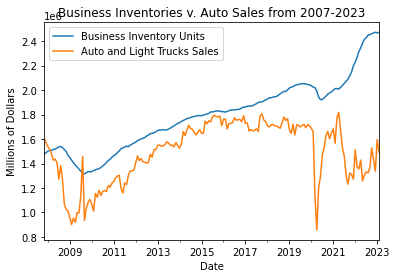

In [616]:
output2.plot(title='Business Inventories v. Auto Sales from 2007-2023')
plt.legend(['Business Inventory Units', 'Auto and Light Trucks Sales'])
plt.xlabel('Date')
plt.ylabel('Millions of Dollars')
plt.show()

In [627]:
#businvdf2["Year"] = [i for i in range(2007,2024)]

In [629]:
import pandas_bokeh
from bokeh.plotting import figure,output_notebook, show
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import column

In [630]:
source = ColumnDataSource(data=output2)

fig_one = figure(x_axis_label="Year", y_axis_label="Millions of Dollars of Business Inventory", 
                 x_axis_type="datetime",
                 width = 500, height = 500)
fig_one.line(x="DATE", y="BUSINV", source=source, legend_label="Business Inventory Units")
fig_one.title = "Dollars Worth of Business Inventories from 2007-2023" 
fig_one.legend.location = "top_left"

fig_two = figure(x_axis_label="Year", y_axis_label="Millions of Dollars", x_axis_type="datetime",
                 width = 500, height = 500)
fig_two.line(x='DATE', y='ALTSALES', source=source, color='Red', legend_label="Auto and Light Trucks Sales")
fig_two.title = "Dollars Worth of Auto and Light Truck Sales from 2007-2023"
fig_two.legend.location = "top_left"

show(column(fig_one, fig_two))

In [631]:
source = ColumnDataSource(data=output2)

fig=figure(x_axis_label="Year", y_axis_label="Millions of Dollars",
            x_axis_type="datetime")
fig.yaxis[0].formatter = NumeralTickFormatter(format="$0.0a")
fig.title = "Business Inventories v. Auto Sales from 2007-2023"
fig.line(x="DATE", y="BUSINV", source=source, legend_label="Business Inventory Units")
fig.line(x='DATE', y='ALTSALES', source=source, color='Red', legend_label="Auto and Light Trucks Sales")
fig.legend.location = "top_left"
fig.legend.click_policy = "hide"
show(fig)

Hover = HoverTool()
hover = HoverTool(
    tooltips = [
        ("Date", "@date_time")])
fig.add_tools(hover)

show(fig)